In [14]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [109]:
studyName = 'bcms' # eshop, bcms , crypto, suv

In [115]:
regr_data = pd.read_csv(studyName + '_regressionData.csv')
data_X_train, data_X_test, data_Y_train, data_Y_test =train_test_split(regr_data.drop(['Feature'],axis=1),regr_data['Feature'], test_size=0.2,random_state=43)

reg = LogisticRegression(solver='lbfgs')
pd.options.display.max_rows = None
reg.fit(data_X_train, data_Y_train)
y_pred = reg.predict(data_X_test)
y_pred_proba = reg.predict_proba(data_X_test)[::,1]

cut_off = 0.2

actual = data_Y_test
predicted1 = np.transpose(y_pred_proba)
predicted2 = predicted1 > cut_off
predicted = predicted2.astype(int)
#print(predicted)
#print(predicted.shape)
#print(data_Y_test.shape)
pd.crosstab(data_Y_test, predicted, rownames =['Actual'], colnames=['Predicted'])/data_Y_test.shape[0]

Predicted,0,1
Actual,,
0,0.835664,0.034965
1,0.108392,0.020979


In [116]:
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))
roc_auc_score(actual, predicted)

Confusion Matrix :
[[239  10]
 [ 31   6]]
Accuracy Score : 0.8566433566433567
Report : 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       249
           1       0.38      0.16      0.23        37

   micro avg       0.86      0.86      0.86       286
   macro avg       0.63      0.56      0.57       286
weighted avg       0.82      0.86      0.83       286



0.5610007597959406

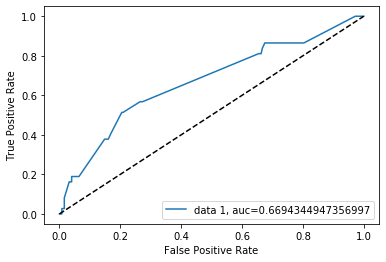

In [117]:
y_pred_proba = reg.predict_proba(data_X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(data_Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(data_Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(fpr,fpr, linestyle='--',color='k')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()